In [825]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)
stud_math_v0 = pd.read_csv('stud_math.csv')

### Предобработка

In [826]:
# функция для нахождения и вывода информации о кол-во пустых строк в столбце
def nan_cell_print(col):
    n = len(stud_math[col])-(stud_math[col].value_counts()).sum()
    if n > 0:
        return print('Столбец {0} содержит {1} незаполненных значений с типом nan.'.format(col, n))
    else:
        return print('Столбец {0} полностью заполнен.'.format(col))


# функция для определения вывода информаиии о уникальных значениях
def info_uniq_nan(col):
    arr = stud_math[col].unique()
    uniq_list = []
    for i in arr:
        i = str(i)
        if str(i) != 'nan':
            uniq_list.append(i)
    uniq_list.sort()
    return print('В колонке {2} количество уникальных значений {0} - {1}.'.format(len(uniq_list), ((',').join(uniq_list)), col))


# функция для построение гистограммы распределения и определения признака для числовых переменных
def hist(col, x):
    IQR = stud_math[col].quantile(0.75) - stud_math[col].quantile(0.25)
    Q1 = stud_math[col].quantile(0.25)
    Q3 = stud_math[col].quantile(0.75)
    print('25-й перцентиль: {},'.format(Q1), '75-й перцентиль: {},'.format(Q3),
          "IQR: {}, ".format(IQR), "Границы выбросов: [{f}, {l}].".format(f=Q1 - 1.5*IQR, l=Q3 + 1.5*IQR))
    return stud_math[col].loc[stud_math[col].between(Q1 - 1.5*IQR, Q3 + 1.5*IQR)].hist(bins=x, label='IQR'), plt.legend()


# функция для построение построения боксплотов номинативных нечисловых переменных
def get_boxplot(col):
    fig, ax = plt.subplots(figsize=(14, 4))
    sns.boxplot(x=col, y='score',
                data=stud_math.loc[stud_math.loc[:, col].isin(
                    stud_math.loc[:, col].value_counts().index[:10])],
                ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + col)
    plt.show()


# тест Стьюдента
def get_stat_dif(column):
    cols = stud_math.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(stud_math.loc[stud_math.loc[:, column] == comb[0], 'score'],
                     stud_math.loc[stud_math.loc[:, column] == comb[1], 'score']).pvalue \
                <= 0.05/len(combinations_all):  # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

### 1. Выполним первичную обработку данных

In [827]:
display(stud_math_v0.head(5))  # получим инф-ию по имеющимся данным
stud_math_v0.info()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

В столбце score есть незаполенные значения, т.к. целевой параметр для анализа - это оценка учеников, то удалим строки содержащие NaN в столбце score. Количество строк сократиться на 6 штук.  

In [828]:
stud_math = stud_math_v0.dropna(subset=['score'])
stud_math = stud_math.reset_index()
stud_math.drop(['index'], inplace=True, axis=1)
display(stud_math.head(5))
stud_math.info()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 389 entries, 0 to 388
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               389 non-null    object 
 1   sex                  389 non-null    object 
 2   age                  389 non-null    int64  
 3   address              374 non-null    object 
 4   famsize              362 non-null    object 
 5   Pstatus              344 non-null    object 
 6   Medu                 386 non-null    float64
 7   Fedu                 365 non-null    float64
 8   Mjob                 370 non-null    object 
 9   Fjob                 353 non-null    object 
 10  reason               372 non-null    object 
 11  guardian             358 non-null    object 
 12  traveltime           361 non-null    float64
 13  studytime            382 non-null    float64
 14  failures             367 non-null    float64
 15  schoolsup            380 non-null    obj

In [829]:
for i in stud_math.columns:
    nan_cell_print(i)

Столбец school полностью заполнен.
Столбец sex полностью заполнен.
Столбец age полностью заполнен.
Столбец address содержит 15 незаполненных значений с типом nan.
Столбец famsize содержит 27 незаполненных значений с типом nan.
Столбец Pstatus содержит 45 незаполненных значений с типом nan.
Столбец Medu содержит 3 незаполненных значений с типом nan.
Столбец Fedu содержит 24 незаполненных значений с типом nan.
Столбец Mjob содержит 19 незаполненных значений с типом nan.
Столбец Fjob содержит 36 незаполненных значений с типом nan.
Столбец reason содержит 17 незаполненных значений с типом nan.
Столбец guardian содержит 31 незаполненных значений с типом nan.
Столбец traveltime содержит 28 незаполненных значений с типом nan.
Столбец studytime содержит 7 незаполненных значений с типом nan.
Столбец failures содержит 22 незаполненных значений с типом nan.
Столбец schoolsup содержит 9 незаполненных значений с типом nan.
Столбец famsup содержит 38 незаполненных значений с типом nan.
Столбец paid 

Итак, имеем 30 колонок из которых заполнены полностью только 4, включая целевой показатель. 

### 2. Начнем анализ данных с числовых переменных. 

### 2.1 age - количественная переменная 

Столбец age полностью заполнен.
25-й перцентиль: 16.0, 75-й перцентиль: 18.0, IQR: 2.0,  Границы выбросов: [13.0, 21.0].


(<AxesSubplot:>, <matplotlib.legend.Legend at 0x21c631c60d0>)

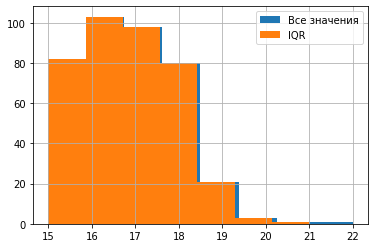

In [830]:
nan_cell_print('age')
stud_math.age.hist(bins=8, label='Все значения')
hist('age', 7)

Выбросов данных нет, хоть ученики страше 21 и выходят за правую границу выбросов. Данные полностью находятся в исследуемом  диапозоне от 15 до 22 лет.

In [831]:
stud_math.failures.value_counts()

0.0    290
1.0     48
2.0     15
3.0     14
Name: failures, dtype: int64

### 2.2 Medu - номинативная числовая переменная 

Столбец Medu содержит 3 незаполненных значений с типом nan.
25-й перцентиль: 2.0, 75-й перцентиль: 4.0, IQR: 2.0,  Границы выбросов: [-1.0, 7.0].
В колонке Medu количество уникальных значений 5 - 0.0,1.0,2.0,3.0,4.0.


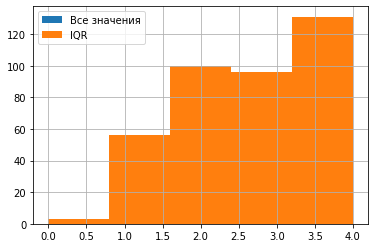

In [832]:
nan_cell_print('Medu')
stud_math.Medu.hist(bins=5, label='Все значения')
hist('Medu', 5)
info_uniq_nan('Medu')

Выбросов данных нет, данные полностью находятся в рассматриваемом диапозоне от 0 до 4 с шагом 1.

### 2.3 Fedu - номинативная числовая переменная 

Столбец Fedu содержит 24 незаполненных значений с типом nan.
25-й перцентиль: 2.0, 75-й перцентиль: 3.0, IQR: 1.0,  Границы выбросов: [0.5, 4.5].
В колонке Fedu количество уникальных значений 6 - 0.0,1.0,2.0,3.0,4.0,40.0.


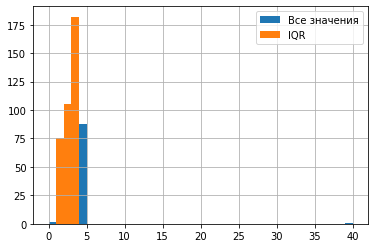

In [833]:
nan_cell_print('Fedu')
stud_math.Fedu.hist(bins=40, label='Все значения')
hist('Fedu', 3)
info_uniq_nan('Fedu')

Видим явный выброс, ему соответствует уникальное значение 40. Предполагая, что в данных опечатка - вместо 40 должна была бать категория 4. Два решения, либо избавиться от значения либо заменить его на 4. Выбираю второе. 

C:\Users\tkre\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


Столбец Fedu содержит 24 незаполненных значений с типом nan.
В колонке Fedu количество уникальных значений 5 - 0.0,1.0,2.0,3.0,4.0.


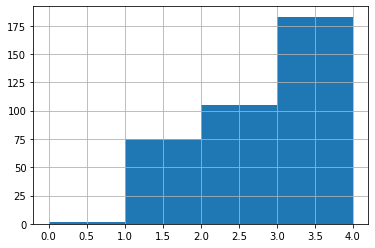

In [834]:
stud_math.Fedu.loc[stud_math['Fedu'] == 40] = 4.0
nan_cell_print('Fedu')
stud_math.Fedu.hist(bins=4, label='Все значения')
info_uniq_nan('Fedu')

Выбросов данных нет, данные полностью находятся в рассматриваемом диапозоне от 0 до 4 с шагом 1.

### 2.4 traveltime - номинативная числовая переменная 

Столбец traveltime содержит 28 незаполненных значений с типом nan.
25-й перцентиль: 1.0, 75-й перцентиль: 2.0, IQR: 1.0,  Границы выбросов: [-0.5, 3.5].
В колонке traveltime количество уникальных значений 4 - 1.0,2.0,3.0,4.0.


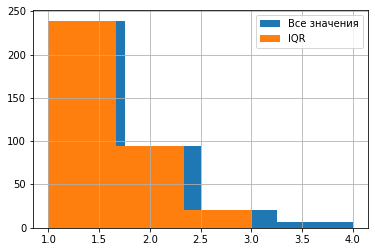

In [835]:
nan_cell_print('traveltime')
stud_math.traveltime.hist(bins=4, label='Все значения')
hist('traveltime', 3)
info_uniq_nan('traveltime')

Выбросов данных нет, данные полностью находятся в рассматриваемом диапозоне от 1 до 4 с шагом 1.

### 2.5 studytime - номинативная числовая переменная 

Столбец studytime содержит 7 незаполненных значений с типом nan.
25-й перцентиль: 1.0, 75-й перцентиль: 2.0, IQR: 1.0,  Границы выбросов: [-0.5, 3.5].
В колонке studytime количество уникальных значений 4 - 1.0,2.0,3.0,4.0.


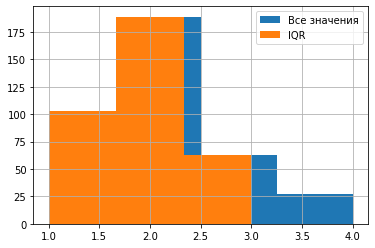

In [836]:
nan_cell_print('studytime')
stud_math.studytime.hist(bins=4, label='Все значения')
hist('studytime', 3)
info_uniq_nan('studytime')

Выбросов данных нет, данные полностью находятся в рассматриваемом диапозоне от 1 до 4 с шагом 1.

### 2.6 studytime, granular - номинативная числовая переменная 

Столбец studytime, granular содержит 7 незаполненных значений с типом nan.
25-й перцентиль: -6.0, 75-й перцентиль: -3.0, IQR: 3.0,  Границы выбросов: [-10.5, 1.5].
В колонке studytime, granular количество уникальных значений 4 - -12.0,-3.0,-6.0,-9.0.


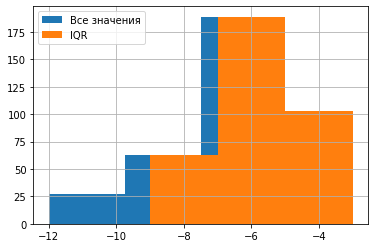

In [837]:
nan_cell_print('studytime, granular')
stud_math['studytime, granular'].hist(bins=4, label='Все значения')
hist('studytime, granular', 3)
info_uniq_nan('studytime, granular')

Гистограмма "studytime, granular" "Все значение" по форме напоминает гистограмму "studytime", только симметрично отображенную.

<AxesSubplot:xlabel='studytime, granular', ylabel='studytime'>

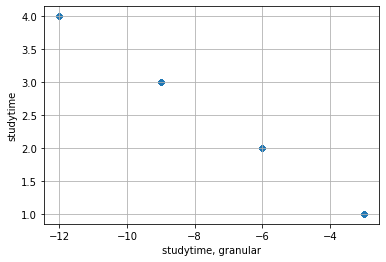

In [838]:
stud_math.plot(x='studytime, granular',
               y='studytime',
               kind='scatter',
               grid=True,)

Видим, что значения "studytime, granular" получены путем умножения значений "studytime" на -3. Отсюда делаем вывод, что столбец "studytime, granular" прямопропорционален столбцу "studytime", а следовательно дополнительной информативной нагрузки за собой не несет. Поэтому удалеем его. 

In [839]:
stud_math = stud_math.drop('studytime, granular', 1)

### 2.7 failures  - номинативная числовая переменная 

Столбец failures содержит 22 незаполненных значений с типом nan.
25-й перцентиль: 0.0, 75-й перцентиль: 0.0, IQR: 0.0,  Границы выбросов: [0.0, 0.0].
В колонке failures количество уникальных значений 4 - 0.0,1.0,2.0,3.0.


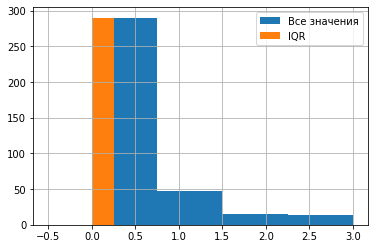

In [840]:
nan_cell_print('failures')
stud_math.failures.hist(bins=4, label='Все значения')
hist('failures', 4)
info_uniq_nan('failures')

Выбросов нет т.к. значение 1,2,3,0. Не совсем понимаю смысл сбора данных в данную колонку таким образом. Т.к. данный столбец посути номинативно - количественный, ведь мы знаем точное число неудач у некоторых учеников (1,2 или 3). Но при этом других учеников с "0" в ячейке просто относим в другую группу, которая опять же не информатинва, потому что одновременно содержит 2 группы учеников: одни с n=0, другие с n > 3 неудач. Проще было либо собирать кол-во неудач у каждого, либо делить на группы с определенным интервалом. 

### 2.8 famrel - номинативная числовая переменная 

Столбец famrel содержит 27 незаполненных значений с типом nan.
25-й перцентиль: 4.0, 75-й перцентиль: 5.0, IQR: 1.0,  Границы выбросов: [2.5, 6.5].
В колонке famrel количество уникальных значений 6 - -1.0,1.0,2.0,3.0,4.0,5.0.


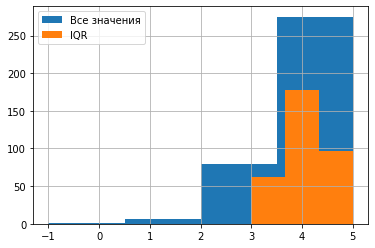

In [841]:
nan_cell_print('famrel')
stud_math.famrel.hist(bins=4, label='Все значения')
hist('famrel', 3)
info_uniq_nan('famrel')

Есть явный выбросы: -1.0 и 0, т.к. данные должны содержать значения от 1 до 5 c шагом 1. Полагаю, что те, кто поставил 0 и -1 хотели таким образом количественно оценить проблемы в семье. Но тем менее они попадают в номинативную категорию 1 - очень плохо. Поэтому заменим значения с -1  и  0 на 1. 

Столбец famrel содержит 27 незаполненных значений с типом nan.
В колонке famrel количество уникальных значений 5 - 1.0,2.0,3.0,4.0,5.0.


C:\Users\tkre\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


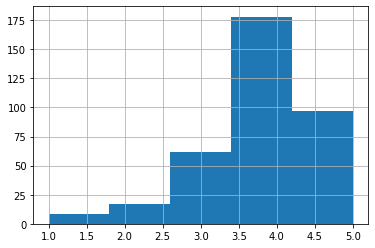

In [842]:
stud_math.famrel.loc[stud_math['famrel'] < 1] = 1
nan_cell_print('famrel')
stud_math.famrel.hist(bins=5, label='Все значения')
info_uniq_nan('famrel')

### 2.9 freetime - номинативная числовая переменная 

Столбец freetime содержит 9 незаполненных значений с типом nan.
25-й перцентиль: 3.0, 75-й перцентиль: 4.0, IQR: 1.0,  Границы выбросов: [1.5, 5.5].
В колонке freetime количество уникальных значений 5 - 1.0,2.0,3.0,4.0,5.0.


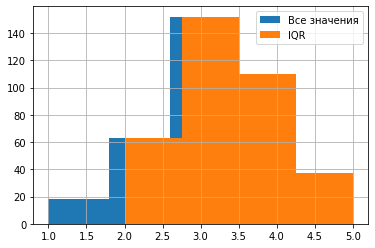

In [843]:
nan_cell_print('freetime')
stud_math.freetime.hist(bins=5, label='Все значения')
hist('freetime', 4)
info_uniq_nan('freetime')

Выбросов данных нет, данные полностью находятся в рассматриваемом диапозоне от 1 до 5 с шагом 1.

### 2.10 goout - номинативная числовая переменная 

Столбец goout содержит 7 незаполненных значений с типом nan.
25-й перцентиль: 2.0, 75-й перцентиль: 4.0, IQR: 2.0,  Границы выбросов: [-1.0, 7.0].
В колонке goout количество уникальных значений 5 - 1.0,2.0,3.0,4.0,5.0.


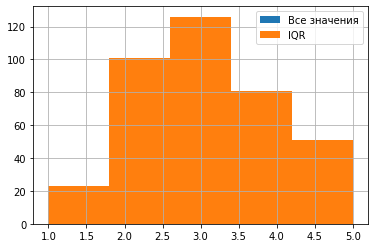

In [844]:
nan_cell_print('goout')
stud_math.goout.hist(bins=5, label='Все значения')
hist('goout', 5)
info_uniq_nan('goout')

Выбросов данных нет, данные полностью находятся в рассматриваемом диапозоне от 1 до 5 с шагом 1.

### 2.11 health - номинативная числовая переменная 

Столбец health содержит 15 незаполненных значений с типом nan.
25-й перцентиль: 3.0, 75-й перцентиль: 5.0, IQR: 2.0,  Границы выбросов: [0.0, 8.0].
В колонке health количество уникальных значений 5 - 1.0,2.0,3.0,4.0,5.0.


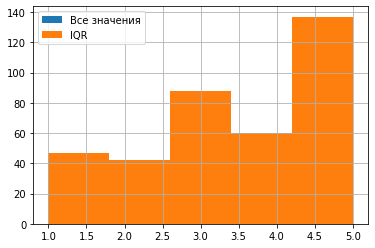

In [845]:
nan_cell_print('health')
stud_math.health.hist(bins=5, label='Все значения')
hist('health', 5)
info_uniq_nan('health')

Выбросов данных нет, данные полностью находятся в рассматриваемом диапозоне от 1 до 5 с шагом 1.

### 2.12 absences - количественная  переменная 

Столбец absences содержит 11 незаполненных значений с типом nan.
25-й перцентиль: 0.0, 75-й перцентиль: 8.0, IQR: 8.0,  Границы выбросов: [-12.0, 20.0].


(<AxesSubplot:>, <matplotlib.legend.Legend at 0x21c64d057f0>)

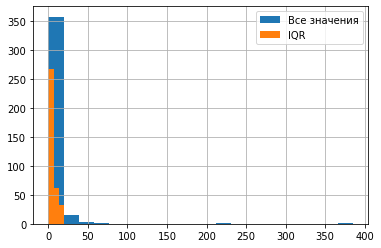

In [846]:
nan_cell_print('absences')
stud_math.absences.hist(bins=20, label='Все значения')
hist('absences', 3)

Присутствуют явные выбросы, один из учеников отсутствовал более календарного года, другой более учебного. Отфильтруем данные.

Столбец absences полностью заполнен.


<AxesSubplot:>

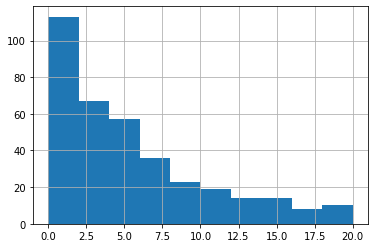

In [847]:
stud_math = stud_math.loc[stud_math['absences'] <= 20]
nan_cell_print('absences')
stud_math.absences.hist(bins=10, label='Все значения')

### 2.13 score - количественная переменная (целевая переменная)

Столбец score полностью заполнен.
25-й перцентиль: 40.0, 75-й перцентиль: 70.0, IQR: 30.0,  Границы выбросов: [-5.0, 115.0].


(<AxesSubplot:>, <matplotlib.legend.Legend at 0x21c64c4b8b0>)

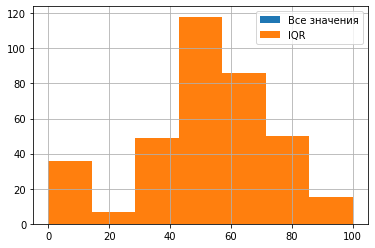

In [848]:
nan_cell_print('score')
stud_math.score.hist(bins=7, label='Все значения')
hist('score', 7)

### 3. Корреляционный анализ

Для количественных переменных

In [849]:
stud_math[['age', 'absences', 'score']].corr()

,age,absences,score
age,1.000000,0.155469,-0.159306
absences,0.155469,1.000000,0.081274
score,-0.159306,0.081274,1.000000


Для числовых переменных

In [850]:
stud_math.corr()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,health,absences,score
age,1.000000,-0.164627,-0.170310,0.072970,0.000417,0.179170,0.053881,0.043196,0.127582,-0.064051,0.155469,-0.159306
Medu,-0.164627,1.000000,0.625902,-0.189973,0.087904,-0.240567,-0.012270,0.041438,0.058623,-0.055584,0.066439,0.210257
Fedu,-0.170310,0.625902,1.000000,-0.132867,0.009432,-0.284939,-0.020295,-0.012527,0.040273,0.019340,-0.024235,0.113379
traveltime,0.072970,-0.189973,-0.132867,1.000000,-0.097291,0.064499,-0.036739,-0.012274,0.022589,0.001935,-0.050613,-0.074045
studytime,0.000417,0.087904,0.009432,-0.097291,1.000000,-0.176952,0.030359,-0.139698,-0.036747,-0.089648,-0.075454,0.113113
failures,0.179170,-0.240567,-0.284939,0.064499,-0.176952,1.000000,-0.002008,0.088810,0.080343,0.099425,0.076537,-0.329542
famrel,0.053881,-0.012270,-0.020295,-0.036739,0.030359,-0.002008,1.000000,0.174062,0.087324,0.083251,-0.092902,0.061516
freetime,0.043196,0.041438,-0.012527,-0.012274,-0.139698,0.088810,0.174062,1.000000,0.286959,0.040573,0.096281,0.034952
goout,0.127582,0.058623,0.040273,0.022589,-0.036747,0.080343,0.087324,0.286959,1.000000,0.005389,0.113048,-0.122246
health,-0.064051,-0.055584,0.019340,0.001935,-0.089648,0.099425,0.083251,0.040573,0.005389,1.000000,-0.013156,-0.057202


Со score все числовые переменные имеют слабую корреляцию (точнее все имееют очень слабую корреляцию < 0,3, кроме  failures который, имеет просто слабую корреляцию [0.3;0.5]). Так же среди других показателей в матрице можно заметить, что образования родителей средне коррелированы друг с другом. Относительно целевого показателя score можно заметить, что с взрослением оценка уменьшается, так же как и при увеличении время проведенного с друзьями. Увеличение оценки слабо коррелирует с образованием матери, ещё слебее с образованием отца. Внешкольные занятия учебой так же имеют положительную корреляцию с оценкой, примерно равную коррелиции образование отца с оценкой. 

### 4. Анализ номинативных переменных 

In [851]:
nom_col = stud_math.select_dtypes(include='object').columns

In [852]:
for col in nom_col:
    nan_cell_print(col)
    info_uniq_nan(col)

Столбец school полностью заполнен.
В колонке school количество уникальных значений 2 - GP,MS.
Столбец sex полностью заполнен.
В колонке sex количество уникальных значений 2 - F,M.
Столбец address содержит 14 незаполненных значений с типом nan.
В колонке address количество уникальных значений 2 - R,U.
Столбец famsize содержит 22 незаполненных значений с типом nan.
В колонке famsize количество уникальных значений 2 - GT3,LE3.
Столбец Pstatus содержит 38 незаполненных значений с типом nan.
В колонке Pstatus количество уникальных значений 2 - A,T.
Столбец Mjob содержит 16 незаполненных значений с типом nan.
В колонке Mjob количество уникальных значений 5 - at_home,health,other,services,teacher.
Столбец Fjob содержит 34 незаполненных значений с типом nan.
В колонке Fjob количество уникальных значений 5 - at_home,health,other,services,teacher.
Столбец reason содержит 17 незаполненных значений с типом nan.
В колонке reason количество уникальных значений 4 - course,home,other,reputation.
Столб

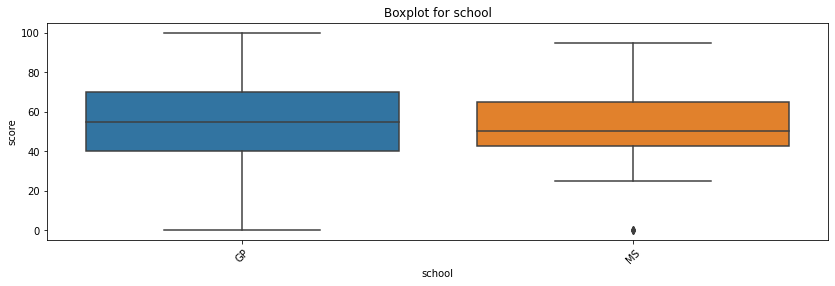

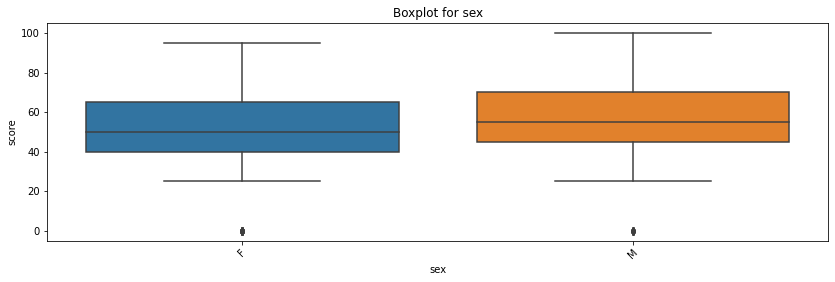

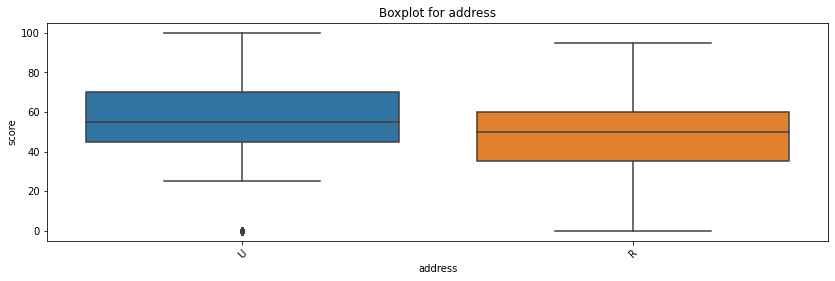

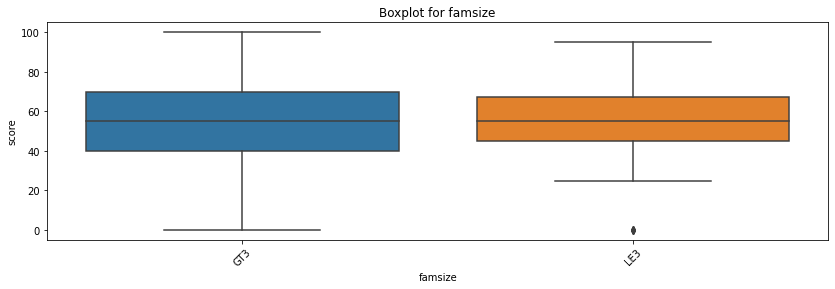

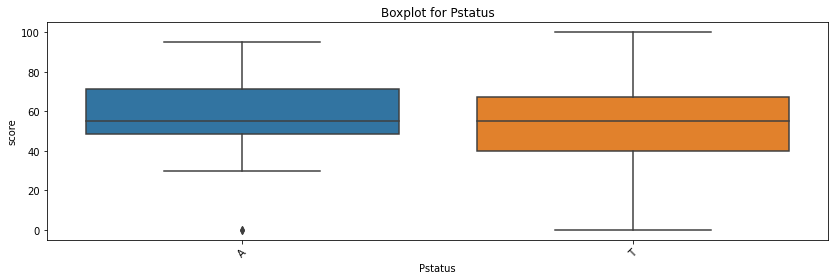

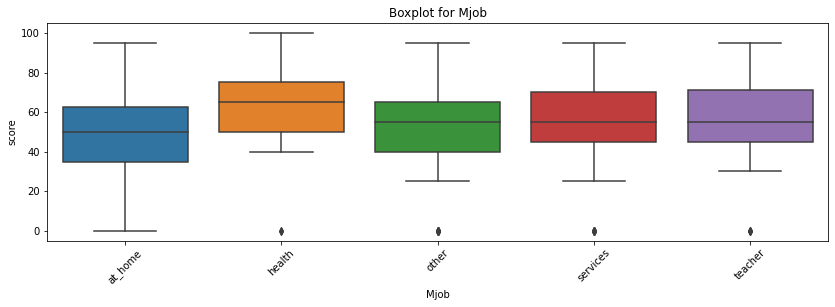

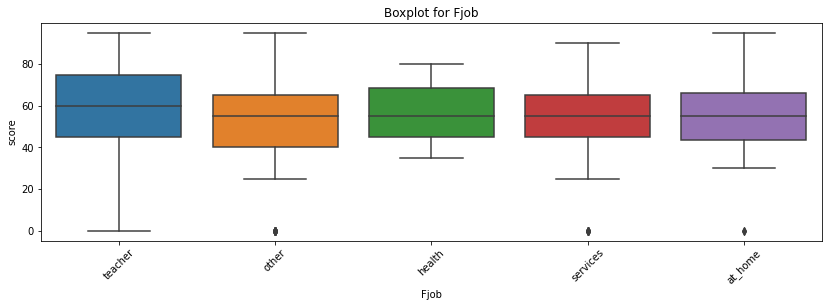

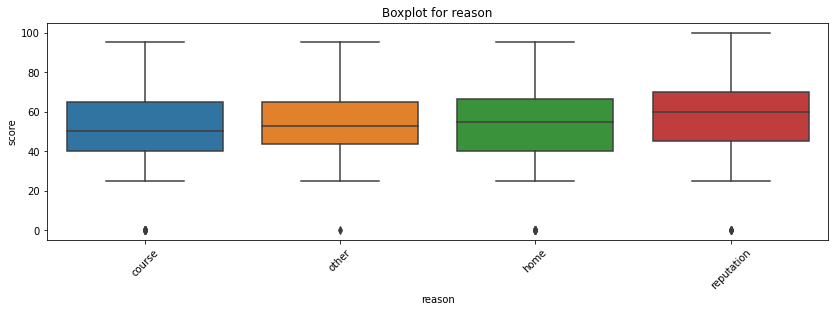

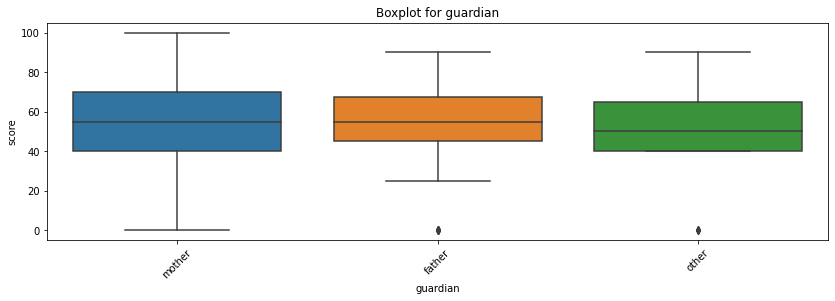

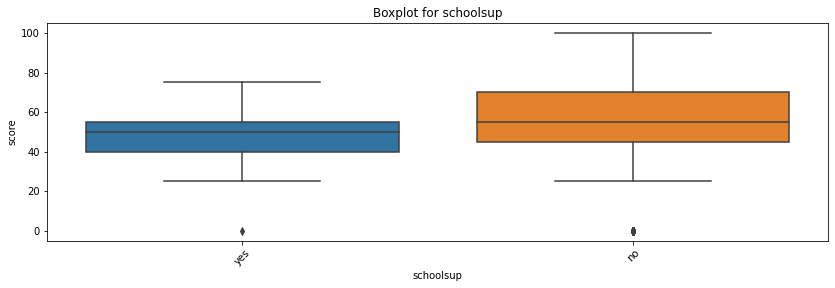

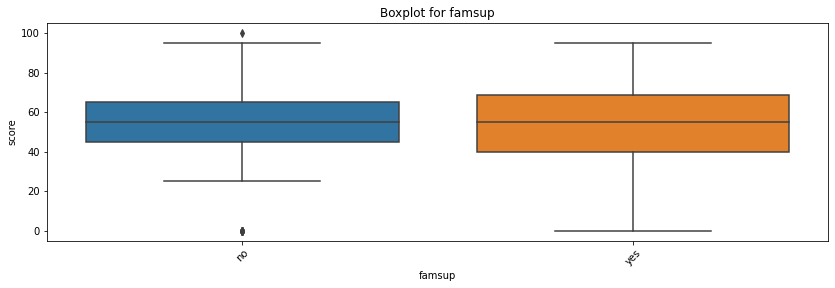

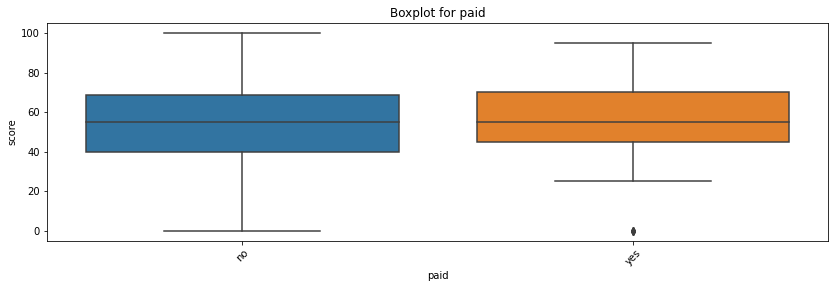

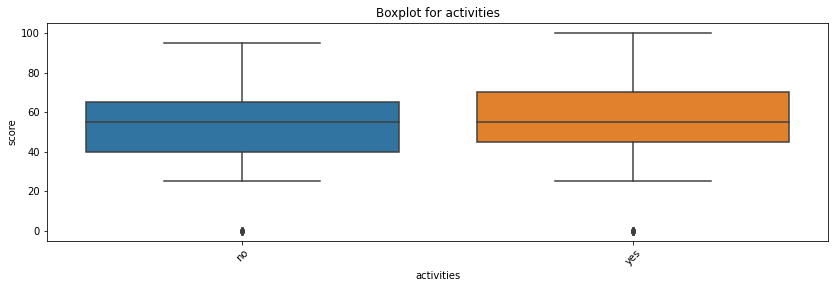

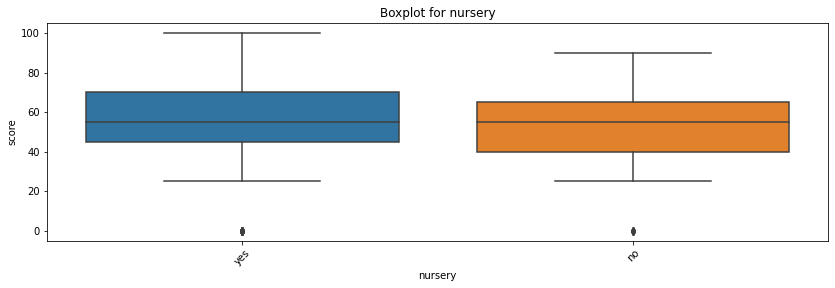

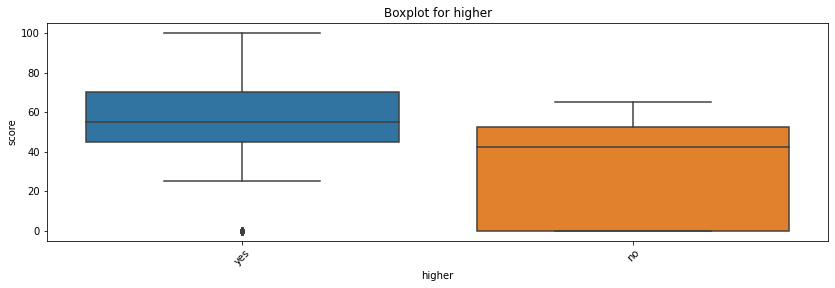

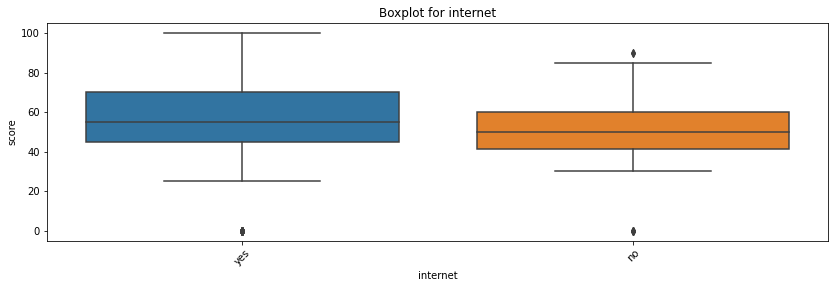

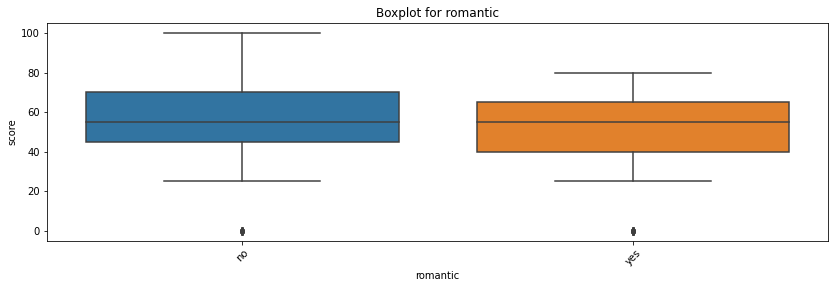

In [853]:
for col in nom_col:
    get_boxplot(col)

По графикам кажется, что влияют следующие параметры: sex, address, Mjob, schoolsup, internet, romantic, activities, higher, higher

Проверим, есть ли статистическая разница в распределении оценок по номинативным признакам, с помощью теста Стьюдента. Проверим нулевую гипотезу о том, что распределения оценок по различным параметрам неразличимы:

In [854]:
for col in nom_col:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки sex
Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки Mjob
Найдены статистически значимые различия для колонки paid
Найдены статистически значимые различия для колонки higher
Найдены статистически значимые различия для колонки romantic


### 4. Вывод

In [855]:
for i in stud_math.columns:
    nan_cell_print(i)

Столбец school полностью заполнен.
Столбец sex полностью заполнен.
Столбец age полностью заполнен.
Столбец address содержит 14 незаполненных значений с типом nan.
Столбец famsize содержит 22 незаполненных значений с типом nan.
Столбец Pstatus содержит 38 незаполненных значений с типом nan.
Столбец Medu содержит 3 незаполненных значений с типом nan.
Столбец Fedu содержит 23 незаполненных значений с типом nan.
Столбец Mjob содержит 16 незаполненных значений с типом nan.
Столбец Fjob содержит 34 незаполненных значений с типом nan.
Столбец reason содержит 17 незаполненных значений с типом nan.
Столбец guardian содержит 30 незаполненных значений с типом nan.
Столбец traveltime содержит 28 незаполненных значений с типом nan.
Столбец studytime содержит 5 незаполненных значений с типом nan.
Столбец failures содержит 19 незаполненных значений с типом nan.
Столбец schoolsup содержит 9 незаполненных значений с типом nan.
Столбец famsup содержит 34 незаполненных значений с типом nan.
Столбец paid 

В данных много пустых значений, изначально было заполнено 3 колонки (school, sex, age). После обработки полностью заполненными стали 5 колонок (school, sex, age, absences, score).   

Были найдены выбросы в следующих 3 колонках  Fedu, famrel, absences. Замечу, что колонки  Fedu, famrel - номинативные числовые колонки, соотвественно с ними проводить математические операции бессмысленно, ибо они не обозначают количество, а делят на группы. И в обоих колонках были опечатки. В Fedu вместо 4 было указано 40, в famrel были значения 0 и -1, которые мы отнесли к группе очень плохо, т.е. заменили на 1. Колонка absences является количественной, поэтому выбросы посчитали арифметически, исходя из значений в колонке, и отфильтровали их. 

Выводы из корреляицонного анализа написанны выше. Замечу в анализе не было столбца "studytime,granular", т.к. я исключил его на этапе обработки. Т.к. он полностью коррелирует со "studytime " за исключением направленности. 

В модель передаем следующие колонки. С комментарием присмотреться к Fedu по причине корреляции с Medu. А так же к failures  см. п.2.7 (я бы его вообще исключил). 

In [856]:
stud_math_model = stud_math.loc[:, ['school', 'sex', 'address', 'Mjob', 'Fjob',
                                    'schoolsup', 'paid', 'higher', 'internet', 'romantic', 'age',
                                    'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout',
                                    'health', 'absences', 'score']]
stud_math_model

,school,sex,address,Mjob,Fjob,schoolsup,paid,higher,internet,romantic,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,health,absences,score
0,GP,F,U,at_home,teacher,yes,no,yes,NaN,no,18,4.0,4.0,2.0,2.0,0.0,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,U,at_home,other,no,no,yes,yes,no,17,1.0,1.0,1.0,2.0,0.0,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,U,at_home,other,yes,NaN,yes,yes,NaN,15,1.0,1.0,1.0,2.0,3.0,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,U,health,NaN,no,yes,yes,yes,yes,15,4.0,2.0,1.0,3.0,0.0,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,U,other,other,no,yes,yes,no,no,16,3.0,3.0,1.0,2.0,0.0,4.0,3.0,2.0,5.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,MS,F,U,other,other,no,no,yes,NaN,no,18,1.0,1.0,NaN,2.0,1.0,1.0,1.0,1.0,5.0,0.0,0.0
385,MS,M,U,services,services,no,no,yes,yes,no,17,3.0,1.0,2.0,1.0,0.0,2.0,4.0,5.0,2.0,3.0,80.0
386,MS,M,R,other,other,NaN,no,NaN,no,no,21,1.0,1.0,1.0,1.0,3.0,5.0,5.0,3.0,3.0,3.0,35.0
387,MS,M,R,services,other,no,no,yes,yes,no,18,3.0,2.0,3.0,1.0,0.0,4.0,4.0,1.0,5.0,0.0,50.0
